# Analysis Demo

In [27]:
import anndata

In [29]:
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import squidpy as sq

from spicemix import model, analysis

import matplotlib.pyplot as plt

## Load Trained Model

In [30]:
replicate_names = ["top", "bottom", "central"]
demo = model.load_trained_model("demo_model.h5ad", replicate_names) # Replace with path to your trained model

/home/shahula/bin/miniconda3/envs/spicemix_distribution/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/shahula/bin/miniconda3/envs/spicemix_distribution/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/shahula/bin/miniconda3/envs/spicemix_distribution/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/shahula/bin/miniconda3/envs/spicemix_distribution/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = va

```{note}
All data (including input gene expression data, spatial coordinates, learned embeddings/metagenes/spatial affinities) can be found within the `spicemix.model.SpiceMixPlus.datasets` attribute. You can build your own analysis functions using that access these information.
```

## Postprocessing

### Normalizing embeddings

In [31]:
demo.embedding_optimizer.embedding_state.normalize(normalized_key="normalized_X")

### Leiden clustering

In [32]:
analysis.leiden(demo, use_rep="normalized_X")

### Computing ARI scores

In [33]:
analysis.compute_ari_scores(demo, labels="cell_type", predictions="leiden")

### Compute empirical spatial correlation of learned embeddings

In [35]:
analysis.compute_empirical_correlations(demo, feature="X")

## Plotting

### Plotting ground truth and clustering results

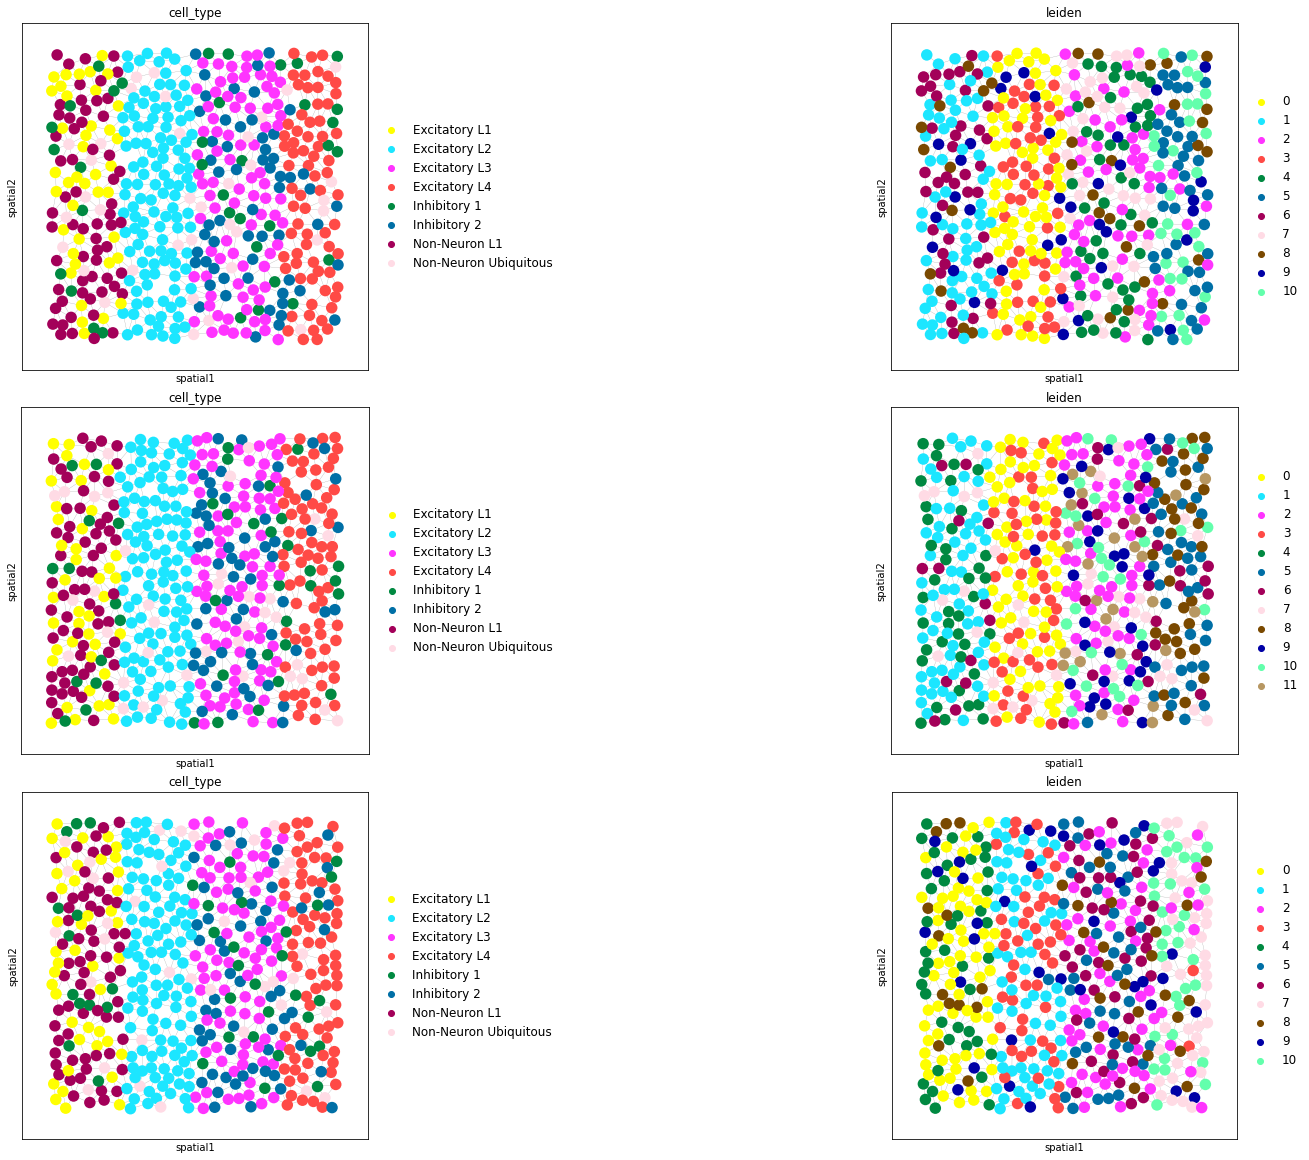

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(24, 16), constrained_layout=True)
analysis.plot_in_situ(demo, color="cell_type", legend_fontsize="large", axes=axes[:, 0])
analysis.plot_in_situ(demo, color="leiden", legend_fontsize="large", axes=axes[:, 1])

### Plot empirical spatial correlation of metagenes

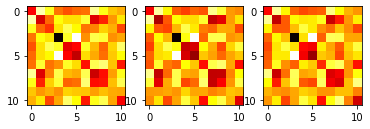

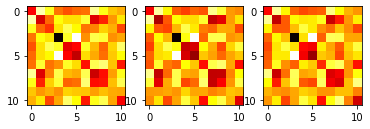

In [37]:
analysis.multireplicate_heatmap(demo, uns="empirical_correlation", aspect=1)

### Plot learned spatial affinities of metagenes

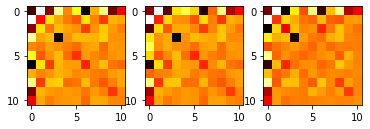

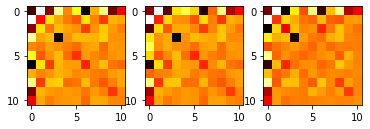

In [38]:
analysis.multireplicate_heatmap(demo, uns="Sigma_x_inv", aspect=1)